# Data Preprocessing

# Data Exploration

In [76]:
# Importing the pandas library to work with data and reading in a cleaned CSV file containing CTA bus ridership data.
import pandas as pd
Data = pd.read_csv(r"E:/fiverr/Rides_analysics_by_hummayoun/CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route (Cleaned).csv")

# Displaying information 

In [77]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891483 entries, 0 to 891482
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Route        891483 non-null  object
 1   Date         891483 non-null  object
 2   Day          891483 non-null  object
 3   Total Rides  891483 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.2+ MB


# Checking for missing values

In [78]:

print(Data.isna().sum())

Route          0
Date           0
Day            0
Total Rides    0
dtype: int64


# Loop through columns of type 'object' and print unique values

In [79]:

for column in Data.select_dtypes(include='object'):
    unique_values = Data[column].unique()
    num_unique_values = Data[column].nunique()
    print(f'{column} ::: {unique_values} ::: Number of Unique Values: {num_unique_values}')


Route ::: ['111th/King Drive' '16th/18th' '31st' '31st/35th' '43rd' '47th' '51st'
 '55th/Austin' '55th/Narragansett' '59th/61st' '63rd' '67th-69th-71st'
 '69th-UPS Express' '71st/South Shore' '74th-75th' '79th' '87th' '95th'
 'Addison' 'Archer' 'Archer/Harlem' 'Armitage' 'Ashland' 'Ashland Express'
 'Austin' 'Belmont' 'Blue Island/26th' 'Broadway'
 'Bronzeville/Union Station' 'California' 'California/Dodge' 'Central'
 'Central/Ridge' 'Cermak' 'Chicago' 'Cicero' 'Clarendon/LaSalle Express'
 'Clarendon/Michigan Express' 'Clark' 'Cottage Grove'
 'Cottage Grove Express' 'Damen' 'Devon' 'Diversey' 'Division'
 'East 103rd' 'Evanston Circulator' 'Foster' 'Fullerton' 'Garfield'
 'Grand' 'Halsted' 'Halsted/95th' 'Harlem' 'Harrison' 'Higgins'
 'Hyde Park Express' 'Inner Lake Shore/Michigan Exp.' 'Irving Park'
 'Jackson' 'Jackson Park Express' 'Jeffery Jump' 'Jeffery Local'
 'Jeffery Manor Express' 'Kedzie' 'Kimball-Homan' 'King Drive' 'Laramie'
 'LaSalle' 'Lawrence' 'Lincoln' 'Lunt' 'Madison' 'M

# Generating summary statistics

In [80]:

Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Rides,891483.0,6493.299917,6294.491032,0.0,1639.0,4274.0,9684.0,45177.0


## Data Transforming

In [81]:
import datetime

# Define a function to correct the date format from 'dd/mm/yyyy' to 'mm dd yyyy'
def correct_datetime(date):
    date_obj = datetime.datetime.strptime(date, '%d/%m/%Y')
    return date_obj.strftime('%m %d %Y')

# Apply the 'correct_datetime' function to the 'Date' column in the DataFrame 'Data'
Data['Date'] = Data['Date'].apply(correct_datetime)

In [82]:
# Convert the 'Date' column to a datetime format
Date1 = pd.to_datetime(Data['Date'])

# Extract day, month, and year components from the 'Date1' column
Date = Date1.dt.day
Month = Date1.dt.month
Year = Date1.dt.year

In [83]:
# Drop the 'Date' column from the DataFrame 'Data' and replace it with separate 'Date', 'Month', and 'Year' columns
Data.drop(columns='Date', inplace=True)
Data['Date'] = Date
Data['Month'] = Month
Data['Year'] = Year

In [84]:
Data

,Route,Day,Total Rides,Date,Month,Year
0,111th/King Drive,Monday,1507,1,1,2001
1,111th/King Drive,Tuesday,4488,2,1,2001
2,111th/King Drive,Wednesday,4563,3,1,2001
3,111th/King Drive,Thursday,4895,4,1,2001
4,111th/King Drive,Friday,6335,5,1,2001
...,...,...,...,...,...,...
891478,Western Express,Monday,2999,26,6,2023
891479,Western Express,Tuesday,3800,27,6,2023
891480,Western Express,Wednesday,3570,28,6,2023
891481,Western Express,Thursday,3585,29,6,2023


## Visualization

In [85]:
# Importing the matplotlib library for basic plotting and seaborn for enhanced visualization
import matplotlib.pyplot as plt
import seaborn as sns

# histogram plot of the 'Total Rides' 

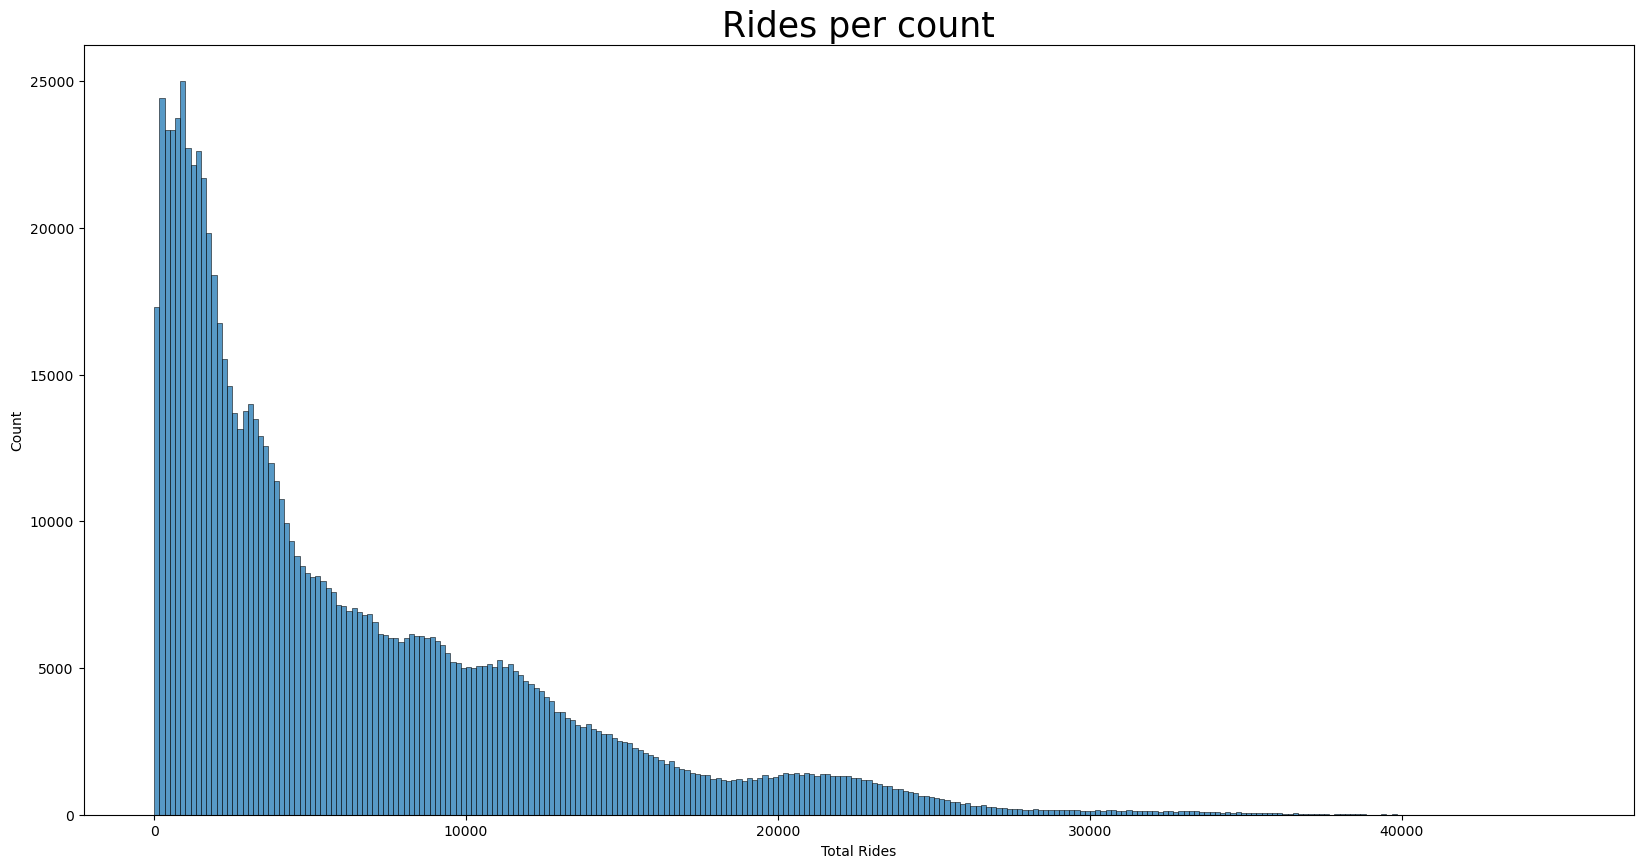

In [86]:

# Adjusting the figure size and adding a title to the plot
plt.figure(figsize=(20, 10))
sns.histplot(Data['Total Rides'])
plt.title("Rides per count", size=25)
plt.show()

# line plot of total rides per day of the week

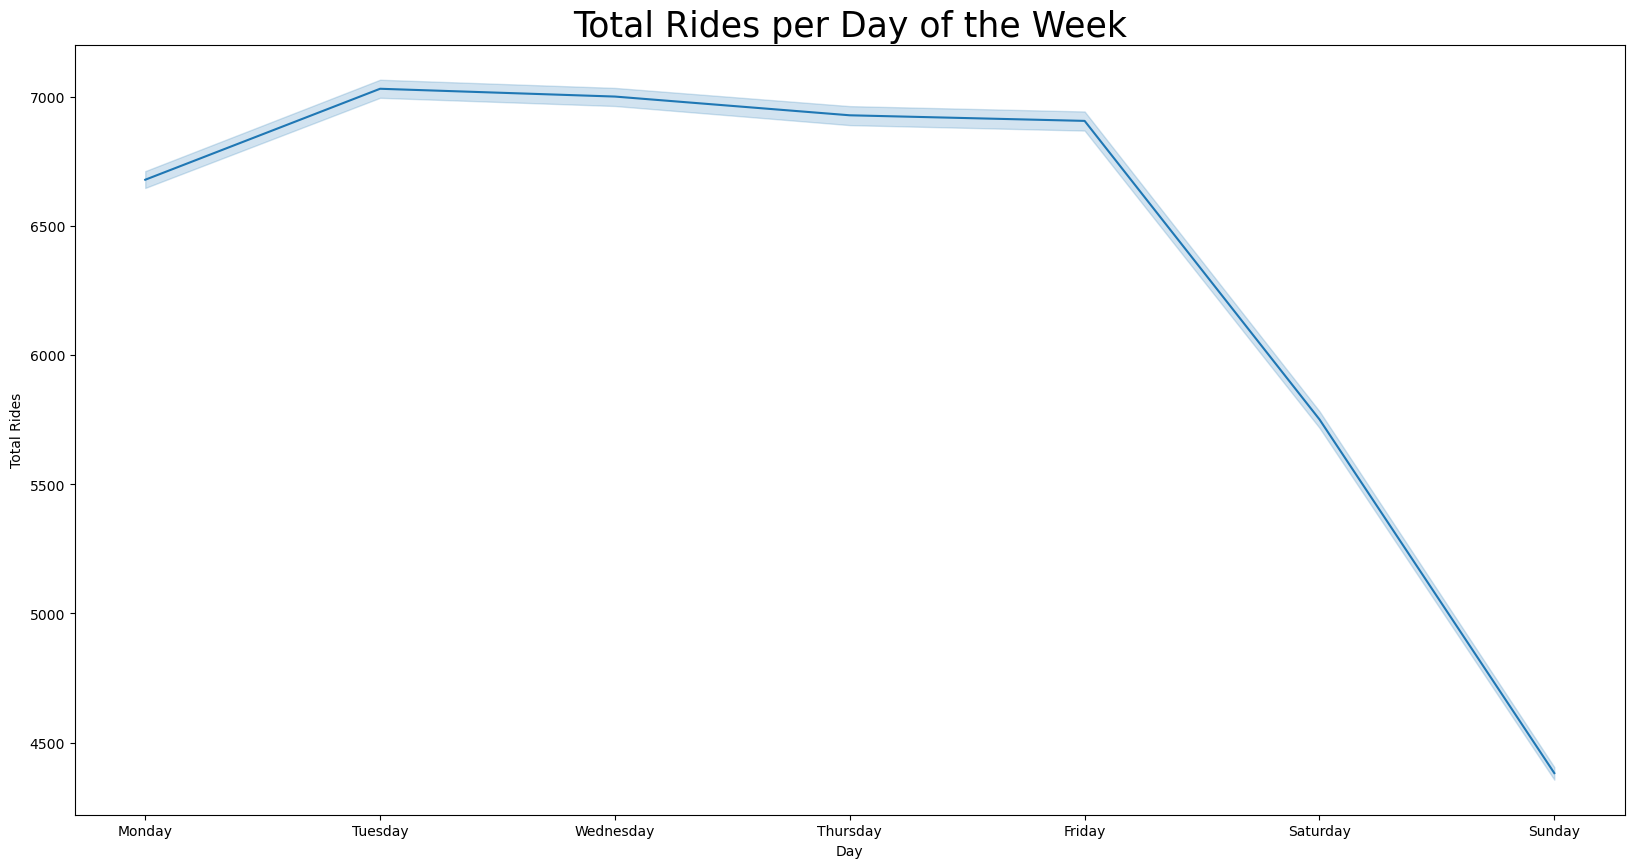

In [87]:
# 
# Adjusting the figure size and adding a title to the plot
plt.figure(figsize=(20, 10))
sns.lineplot(x=Data['Day'], y=Data['Total Rides'])
plt.title('Total Rides per Day of the Week', size=25)
plt.show()

# Creating a box plot to visualize the distribution of total rides per month using seaborn

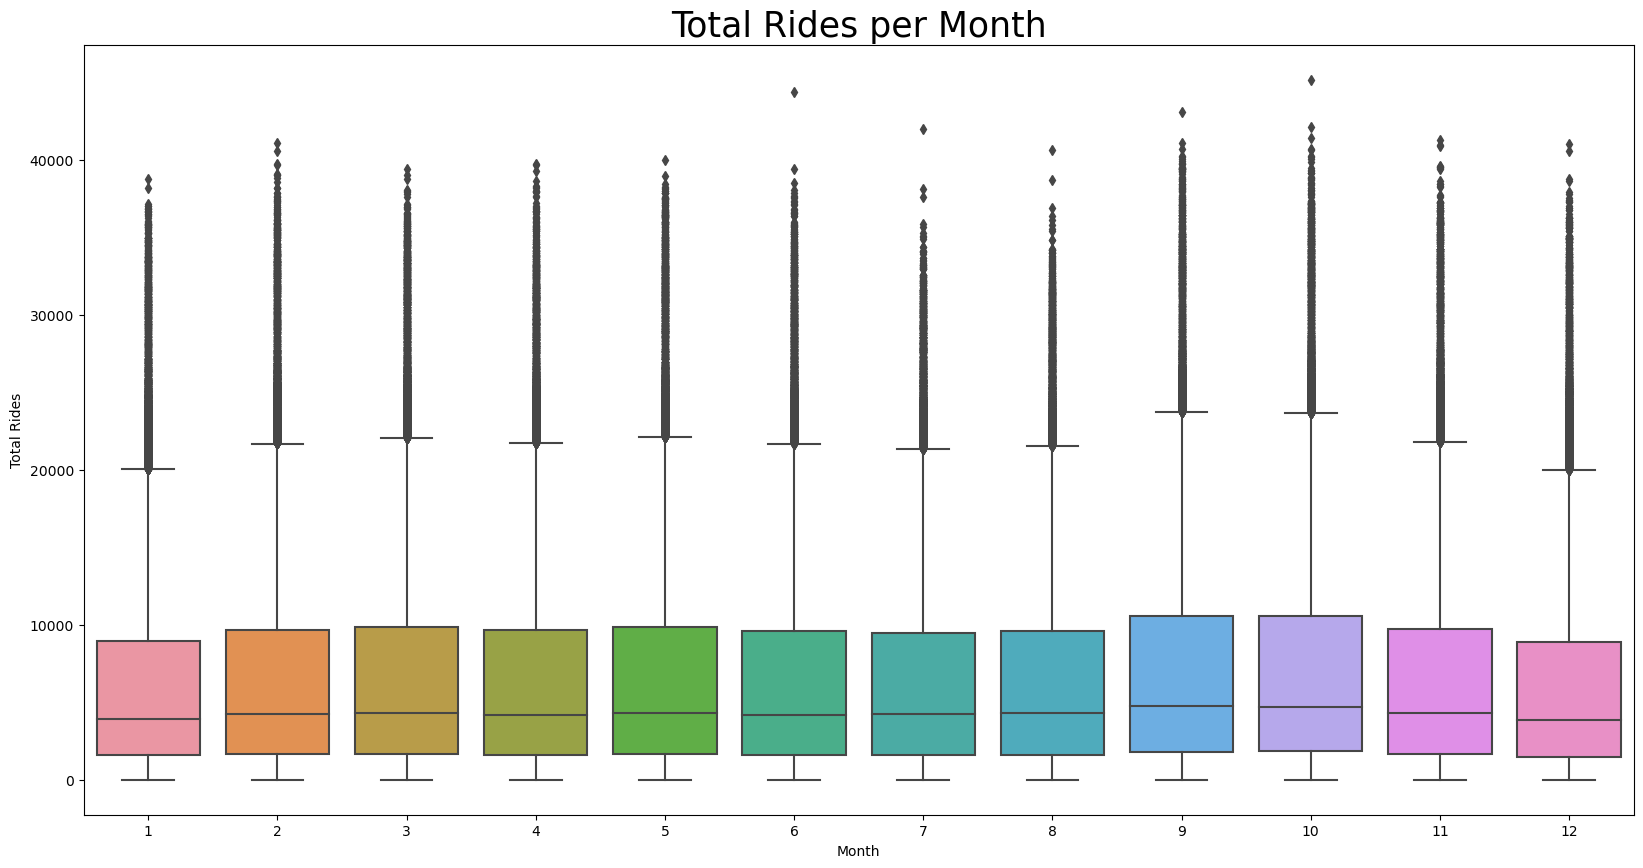

In [88]:
# 
# Adjusting the figure size and adding a title to the plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Month', y='Total Rides', data=Data)
plt.title('Total Rides per Month', size=25)
plt.show()

#  scatter plot to show the relationship between total rides and years 

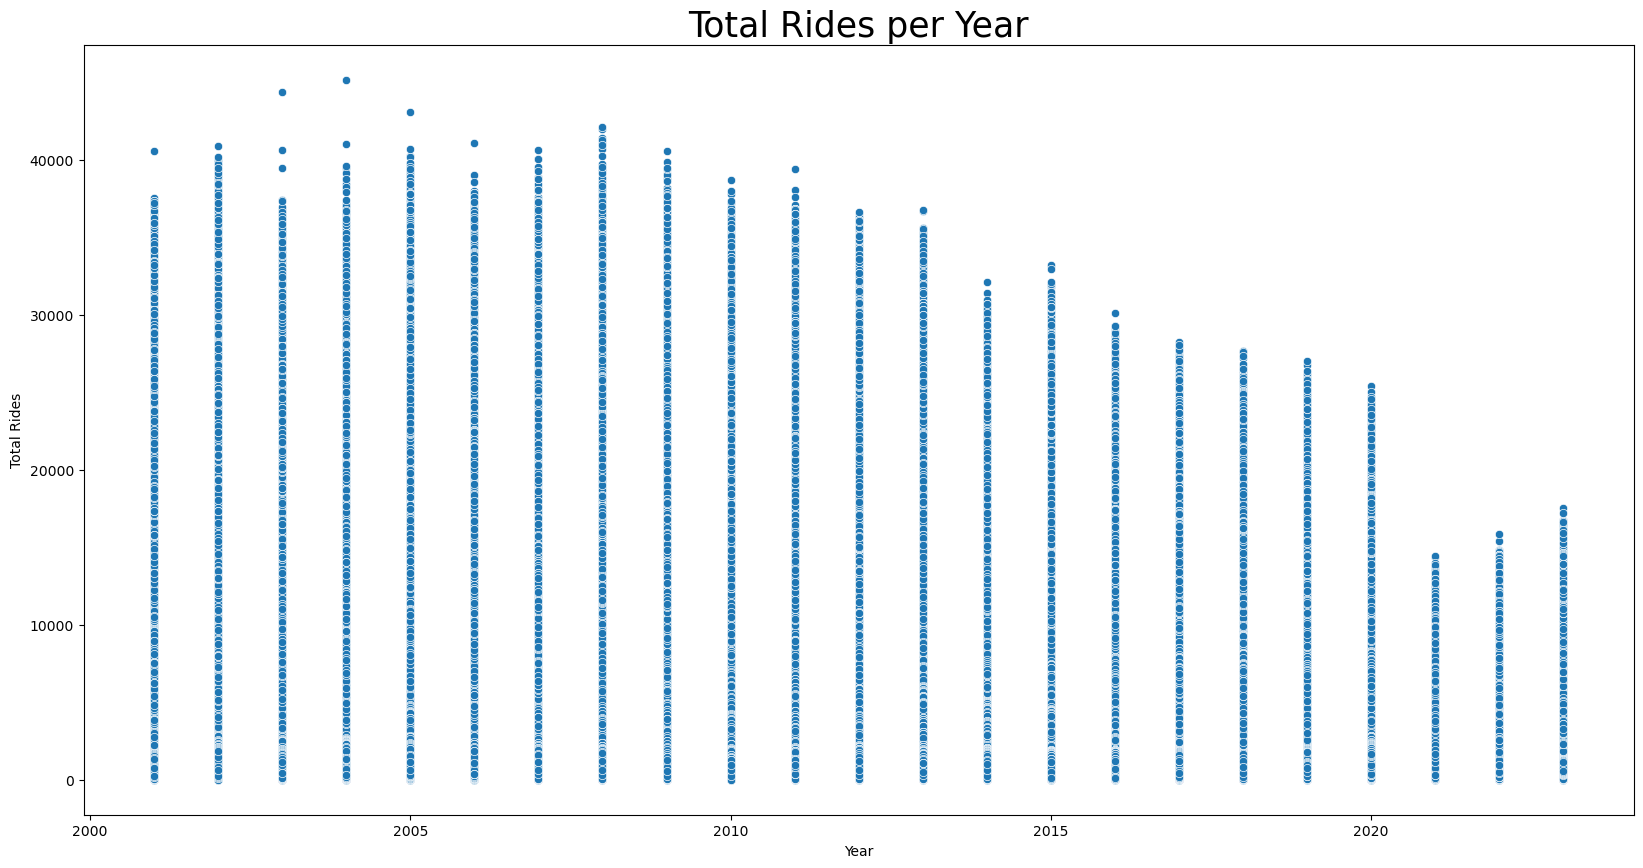

In [89]:
# 
# Adjusting the figure size and adding a title to the plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Year', y='Total Rides', data=Data)
plt.title('Total Rides per Year', size=25)
plt.show()

## Splitting

# One hot encoding,  train test split and standardscaler

In [90]:
# Separating the data into features (x) and target variable (y)
x = Data.drop(columns=['Total Rides'])  # Features
y = Data['Total Rides']  # Target variable

In [91]:
x

,Route,Day,Date,Month,Year
0,111th/King Drive,Monday,1,1,2001
1,111th/King Drive,Tuesday,2,1,2001
2,111th/King Drive,Wednesday,3,1,2001
3,111th/King Drive,Thursday,4,1,2001
4,111th/King Drive,Friday,5,1,2001
...,...,...,...,...,...
891478,Western Express,Monday,26,6,2023
891479,Western Express,Tuesday,27,6,2023
891480,Western Express,Wednesday,28,6,2023
891481,Western Express,Thursday,29,6,2023


In [92]:
y

0         1507
1         4488
2         4563
3         4895
4         6335
          ... 
891478    2999
891479    3800
891480    3570
891481    3585
891482    3245
Name: Total Rides, Length: 891483, dtype: int64

# Converting non numercial columns into numercial for machine learning

In [94]:
# One-hot encoding categorical columns in the feature data 'x'
x = pd.get_dummies(x, drop_first=True)

In [95]:
x

,Date,Month,Year,Route_16th/18th,Route_31st,Route_31st/35th,Route_43rd,Route_47th,Route_51st,Route_55th/Austin,...,Route_West 65th,Route_West Lawrence,Route_Western,Route_Western Express,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1,1,2001,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891478,26,6,2023,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
891479,27,6,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
891480,28,6,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
891481,29,6,2023,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [19]:
# Splitting the data into training and testing sets using scikit-learn's train_test_split function
from sklearn.model_selection import train_test_split

# Splitting the feature data (x) and target variable (y) into training (70%) and testing (30%) sets
# Setting a random seed for reproducibility with random_state=0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [20]:
# Importing the StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object for feature scaling
Scale = StandardScaler()

In [21]:
# Scaling the feature data in the training and testing sets using the StandardScaler
x_train = Scale.fit_transform(x_train)  # Scaling the training data
x_test = Scale.fit_transform(x_test)    # Scaling the testing data

# After one hot encoding applied

In [58]:
x_train.shape

(624038, 135)

In [60]:
x_test.shape

(267445, 135)

# Models

## Linear Regression

In [22]:
# Importing the LinearRegression model from scikit-learn for regression analysis
from sklearn.linear_model import LinearRegression

# Creating a LinearRegression model object
LR = LinearRegression()
# LinearRegression model from scikit-learn, which is used for linear regression analysis.

In [23]:
# Fitting the Linear Regression model to the training data
LR.fit(x_train, y_train)

LinearRegression()

In [24]:
# Making predictions using the trained Linear Regression model on the testing data
y_pred = LR.predict(x_test)

In [59]:
# r2_score: R-squared, a measure of the goodness of fit of the model.

# mean_squared_error: Mean squared error, a measure of the average squared difference between actual and predicted values.

# mean_absolute_error: Mean absolute error, a measure of the average absolute difference between actual and predicted values.

# mean_absolute_percentage_error: Mean absolute percentage error, a measure of the average percentage difference between actual and predicted values.

In [25]:
# Importing metrics for evaluating the performance of the regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [26]:
# Calculating regression performance metrics using the predicted and actual values
MAE = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred)  # Mean Squared Error
MAPE = mean_absolute_percentage_error(y_test, y_pred)  # Mean Absolute Percentage Error
r2 = r2_score(y_test, y_pred)  # R-squared

In [27]:
# Creating a DataFrame to store the performance metrics of the Linear Regression model
model_LR = pd.DataFrame([["LinearRegression", r2, MAE, MSE, MAPE]],
                        columns=['Models', 'r2_score', 'mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error'])

# Printing the DataFrame containing model performance metrics
model_LR

,Models,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,LinearRegression,0.842418,1745.751819,6.227538e+06,5.780666e+13


## Random Forest Regressor

In [34]:
# Importing the RandomForestRegressor model from scikit-learn for regression analysis
from sklearn.ensemble import RandomForestRegressor

# Creating a RandomForestRegressor model object with a specified random seed
RFR = RandomForestRegressor(random_state=0,max_depth=10)
# RandomForestRegressor model from scikit-learn, which is used for regression analysis using random forests.

In [29]:
# Fitting the RandomForestRegressor model to the training data
RFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [30]:
# Making predictions using the trained RandomForestRegressor model on the testing data
y_pred = RFR.predict(x_test)

In [31]:
# Calculating regression performance metrics using the predicted and actual values for the RandomForestRegressor model
MAE = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred)  # Mean Squared Error
MAPE = mean_absolute_percentage_error(y_test, y_pred)  # Mean Absolute Percentage Error
r2 = r2_score(y_test, y_pred)  # R-squared

In [32]:
# Creating a DataFrame to store the performance metrics of the RandomForestRegressor model
model_RFR = pd.DataFrame([["RandomForestRegressor", r2, MAE, MSE, MAPE]],
                        columns=['Models', 'r2_score', 'mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error'])

# Printing the DataFrame containing model performance metrics
model_RFR

,Models,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,RandomForestRegressor,0.464971,3652.169788,2.114400e+07,3.002544e+14


# Neural Network

In [61]:
import tensorflow as tf
from tensorflow.keras import layers

# Create the model
model = tf.keras.Sequential([
    layers.Input(shape=(135,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8704      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10817 (42.25 KB)
Trainable params: 10817 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
history = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/50
1951/1951 [==============================] - 2s 955us/step - loss: 22850172.0000 - val_loss: 5434947.5000
Epoch 2/50
1951/1951 [==============================] - 2s 882us/step - loss: 4981679.5000 - val_loss: 4694760.0000
Epoch 3/50
1951/1951 [==============================] - 2s 873us/step - loss: 4469683.5000 - val_loss: 4353302.5000
Epoch 4/50
1951/1951 [==============================] - 2s 876us/step - loss: 4215624.0000 - val_loss: 4143816.7500
Epoch 5/50
1951/1951 [==============================] - 2s 873us/step - loss: 3933733.0000 - val_loss: 3631341.5000
Epoch 6/50
1951/1951 [==============================] - 2s 878us/step - loss: 3038381.7500 - val_loss: 2658238.0000
Epoch 7/50
1951/1951 [==============================] - 2s 864us/step - loss: 2521355.7500 - val_loss: 2442574.0000
Epoch 8/50
1951/1951 [==============================] - 2s 875us/step - loss: 2382415.0000 - val_loss: 2347203.2500
Epoch 9/50
1951/1951 [==============================] - 2s 876us/step -

In [63]:
# Making predictions using the trained neural network model on the testing data
y_pred = model.predict(x_test)

8358/8358 [==============================] - 4s 495us/step


In [64]:
# Calculating regression performance metrics using the predicted and actual values for the Neural netowrk model
MAE = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
MSE = mean_squared_error(y_test, y_pred)  # Mean Squared Error
MAPE = mean_absolute_percentage_error(y_test, y_pred)  # Mean Absolute Percentage Error
r2 = r2_score(y_test, y_pred)  # R-squared

In [65]:
# Creating a DataFrame to store the performance metrics of the RandomForestRegressor model
model_NN = pd.DataFrame([["NeuralNetwork", r2, MAE, MSE, MAPE]],
                        columns=['Models', 'r2_score', 'mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error'])

# Printing the DataFrame containing model performance metrics
model_NN

,Models,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,NeuralNetwork,0.951812,783.31135,1.904357e+06,7.997096e+13


# Concatenating all the results for comparisons

In [66]:
# Concatenating the performance metrics DataFrames for the Linear Regression and RandomForestRegressor models
Results = pd.concat([model_LR, model_RFR,model_NN], axis=0, ignore_index=True)

In [67]:
Results

,Models,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,LinearRegression,0.842418,1745.751819,6.227538e+06,5.780666e+13
1,RandomForestRegressor,0.464971,3652.169788,2.114400e+07,3.002544e+14
2,NeuralNetwork,0.951812,783.311350,1.904357e+06,7.997096e+13


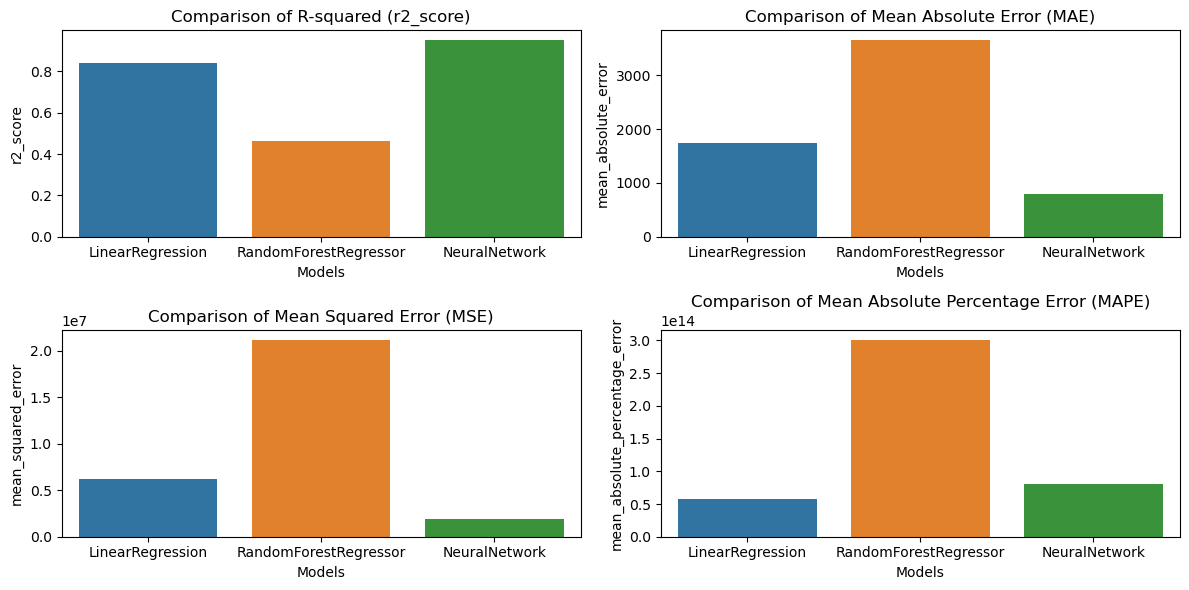

In [68]:
# Creating a figure with a 2x2 grid of subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Comparison of R-squared (r2_score)
plt.subplot(2, 2, 1)
sns.barplot(x='Models', y='r2_score', data=Results)
plt.title('Comparison of R-squared (r2_score)')

# Subplot 2: Comparison of Mean Absolute Error (MAE)
plt.subplot(2, 2, 2)
sns.barplot(x='Models', y='mean_absolute_error', data=Results)
plt.title('Comparison of Mean Absolute Error (MAE)')

# Subplot 3: Comparison of Mean Squared Error (MSE)
plt.subplot(2, 2, 3)
sns.barplot(x='Models', y='mean_squared_error', data=Results)
plt.title('Comparison of Mean Squared Error (MSE)')

# Subplot 4: Comparison of Mean Absolute Percentage Error (MAPE)
plt.subplot(2, 2, 4)
sns.barplot(x='Models', y='mean_absolute_percentage_error', data=Results)
plt.title('Comparison of Mean Absolute Percentage Error (MAPE)')

# Display the subplots
plt.tight_layout()
plt.show()

# The More the R2 score and smaller the errors the model is considered as best so in this case NN is the best model